## Importing all dependencies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## Loading of Data

In [2]:
%%time 
df = pd.read_csv(r'IMDB-Dataset.csv',encoding='latin-1')

CPU times: total: 3.5 s
Wall time: 3.83 s


## Data Cleaning and Preprocessing

In [3]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'other', 'than', "needn't", 'wouldn', "haven't", 'these', 'did', 'too', 'now', 'further', "won't", 'by', 'or', 'down', 'same', 'are', 'in', 've', "didn't", "wouldn't", 'didn', 'myself', 'might', 'does', 'but', 'and', 'while', 'off', 'herself', 'more', 'i', "aren't", 'which', 'very', 'can', 'haven', 'hasn', 'isn', "shouldn't", 'he', 'don', 'needn', 'this', 'doing', 'whom', 'each', 'up', 'such', 'his', 'no', 'weren', 'she', 'shall', 'what', "don't", 'our', 'o', "you'd", 'them', 'on', 'my', 'until', "you've", 'ma', 'been', 're', 'll', 'both', 'hadn', 'here', 'a', 'their', 'wasn', 'through', 'once', "weren't", 'about', 'your', 'some', 'couldn', "you're", 'few', 'against', "she's", 'yours', 'above', 'could', 'during', 'that', 'had', 'for', 'how', 'will', 'shouldn', 'after', 'all', 'any', 'its', 'an', 'when', "couldn't", 'd', 'only', 'own', 'because', "mightn't", 'of', 'yourself', 'into', 'ours', 'won', 'if', "hasn't", 'again', 'before', 'hers', "isn't", 'having', 'most', "you'll", 'themsel

In [4]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [5]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: total: 18.6 s
Wall time: 19.1 s


,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

# Feature Engineering

In [6]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing 
df=df[df.Label<'2']
data=df[['Reviews_clean','Reviews','Ratings','Label']]
print(data['Label'].value_counts())

0    60000
1    60000
Name: Label, dtype: int64


In [7]:
#Importing dependencies for feature engineering 
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

## Lemmatization

In [8]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [9]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
#countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=10000)
#x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
#x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test = test['Label']

In [203]:
y_test_list=y_test.tolist()
y_predict_list=y_predict.tolist()
test_list=test['Reviews_clean'].tolist()
rating_list=test['Ratings'].tolist()

## Model Evaluation

In [252]:
# Import prerequisite libraries
import sys
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

## Logistic Regression Model

In [178]:

model_1=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)
model_2=Pipeline(
    steps=[
    ('vect',TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=10000)),("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None))]
)

## Training of Logistic Regression Model

In [ ]:
%%time
model_1.fit(x_train_tfidf,y_train)

In [ ]:
%%time
model_2.fit(train['Reviews_clean'],y_train)

## Evaluation on multiple metrics dataset 

In [260]:
%%time
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))
print("Precision Score for Logistic Regression Pipeline: %s" % precision_score(y_test,model_2.predict(test['Reviews_clean']),average='micro'))
print("Recall Score for Logistic Regression Pipeline: %s" % recall_score(y_test,model_2.predict(test['Reviews_clean']),average='micro'))
print("AUC Score for Logistic Regression Pipeline: %s" % roc_auc_score(y_test,model_2.predict_proba(test['Reviews_clean'])[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(test['Reviews_clean']),average="weighted")
print("F1 Score for Logistic Regression Pipeline: %s" % f1_score_2)
print("Accuracy Score for Logistic Regression Pipeline: %s" % accuracy_score(y_test,model_2.predict(test['Reviews_clean'])))

Precision Score for Logistic Regression: 0.8963333333333333
Recall Score for Logistic Regression: 0.8963333333333333
AUC Score for Logistic Regression: 0.9606882858645622
F1 Score for Logistic Regression: 0.8963352656232666
Accuracy Score for Logistic Regression: 0.8963333333333333
Precision Score for Logistic Regression Pipeline: 0.8962777777777777
Recall Score for Logistic Regression Pipeline: 0.8962777777777777
AUC Score for Logistic Regression Pipeline: 0.9606883383378441
F1 Score for Logistic Regression Pipeline: 0.8962797229472333
Accuracy Score for Logistic Regression Pipeline: 0.8962777777777777
Wall time: 3min 33s


In [261]:
y_predict=model_1.predict(x_test_tfidf)

## Confusion metrics

In [253]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

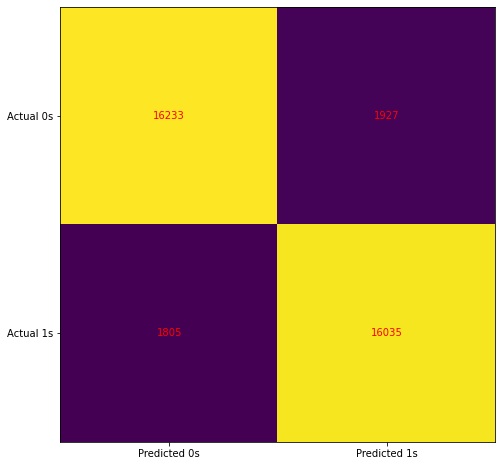

In [250]:
confusion_matrix_plot(y_test,y_predict)

## Analyzing False Positive and False Negative 

In [220]:
from colorama import Fore, Back, Style
fn_dict={}
fp_dict={}
for i in range(0, len(y_test_list)):
    if ((y_test_list[i]=='0') & (y_predict_list[i]=='1')):
        fp_dict[i]=[test_list[i],rating_list[i]]
    elif((y_test_list[i]=='1') & (y_predict_list[i]=='0')):
        fn_dict[i]=[test_list[i],rating_list[i]]
    else:
        pass
    i+=1
for k,v in fp_dict.items():
    if v[1]<=2:
        print(Fore.RED +'False Positive: %s %s'%(k,v))
for k,v in fn_dict.items():
    if v[1]>=9:
        print(Fore.GREEN +'False Negative: %s %s'%(k,v))

False Positive: 15 ['good satire subtle scathing also helps immensely good satire funny mind choose watch film open mind retrospect touch ironic opening shiftless bum blow devil angel via soul well birther jibe movie subtlety brick face ok pj rourke not cut hour half later yes watched whole thing yes instantly regretted found not not laugh spent time dumbfounded inept movie interspersed numerous staged man streets interviews conservative libertarian rendered speechless ammo idiots say conservatives not funny needed site example example prove contrary point film forced say shucks got walk away', 2]
False Positive: 111 ['movie joke seriously anyone right mind think intended applied real life fictional joke something used part religion movie taken context many l ron hubbard wrote fictional movies books different war worlds entertainment piece written intention making people think weird crazy fictional ideas not turned religious cult watch movie feel sorry take seriously intended fictional